In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cred-resolve-intelligence-challenge-next-best/sample_submission.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/whatsapp_activity.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/call_placed.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/AI_sms_callback.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/mobile_app_data.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/train.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/metaData.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/test.csv
/kaggle/input/cred-resolve-intelligence-challenge-next-best/teleco_call_back.csv


In [2]:
df_whatsapp = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/whatsapp_activity.csv")
df_whatsapp.head()

,lead_code,sent_at,status,response_message,read_at
0,LDSMFG_124034,2025-01-10,DELIVERED,NaN,NaN
1,LDSMFG_143014,2025-01-01,DELIVERED,NaN,NaN
2,LDSMFG_192539,2025-01-20,READ,NaN,2025-01-20 11:00:00
3,LDSMFG_141327,2025-01-08,READ,NaN,2025-01-08 12:00:00
4,LDSMFG_163053,2025-01-25,READ,NaN,2025-01-25 10:00:00


In [3]:
df_whatsapp.describe()

,lead_code,sent_at,status,response_message,read_at
count,250000,250000,250000,24928,125138
unique,91783,30,3,2,690
top,LDSMFG_140727,2025-01-09,READ,Wrong number,2025-01-07 06:00:00
freq,12,8583,125138,12633,225


In [4]:
df = df_whatsapp["response_message"].unique()
df

array([nan, 'Wrong number', 'Pay link?'], dtype=object)

In [5]:
new_df_whatsapp = df_whatsapp.groupby("lead_code").agg(
    total_messages = ("lead_code","count"),
    pay_link_requests = ("response_message",lambda x:(x=="Pay link?").sum())
)
new_df_whatsapp.head()

,total_messages,pay_link_requests
lead_code,,
LDSMFG_100000,3,0
LDSMFG_100002,3,0
LDSMFG_100003,2,0
LDSMFG_100004,3,0
LDSMFG_100005,3,0


In [6]:
new_df_whatsapp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91783 entries, LDSMFG_100000 to LDSMFG_199999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total_messages     91783 non-null  int64
 1   pay_link_requests  91783 non-null  int64
dtypes: int64(2)
memory usage: 2.1+ MB


In [7]:
df_call_placed = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/call_placed.csv")
df_call_placed.head()

,lead_code,call_type,disposition,duration,start_time,agent_id
0,LDSMFG_165406,HUMAN,NO_ANSWER,195,2025-01-11,AG_117
1,LDSMFG_193330,HUMAN,NO_ANSWER,208,2025-01-23,AG_146
2,LDSMFG_130724,HUMAN,NO_ANSWER,100,2025-01-29,AG_120
3,LDSMFG_138711,HUMAN,BUSY,89,2025-01-26,AG_101
4,LDSMFG_153922,HUMAN,ANSWERED,229,2025-01-15,AG_133


In [8]:
df_call_placed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74945 entries, 0 to 74944
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   lead_code    74945 non-null  object
 1   call_type    74945 non-null  object
 2   disposition  74945 non-null  object
 3   duration     74945 non-null  int64 
 4   start_time   74945 non-null  object
 5   agent_id     74945 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [9]:
df_c = df_call_placed["disposition"].unique()
df_c

array(['NO_ANSWER', 'BUSY', 'ANSWERED'], dtype=object)

In [10]:
new_df_call_placed = df_call_placed.groupby("lead_code").agg(
    total_calls = ("lead_code","count"),
    responsed_calls = ("disposition",lambda x:(x=="ANSWERED").sum())
)
new_df_call_placed.head()

,total_calls,responsed_calls
lead_code,,
LDSMFG_100001,2,0
LDSMFG_100002,2,0
LDSMFG_100004,1,0
LDSMFG_100006,1,0
LDSMFG_100008,1,0


In [11]:
new_df_call_placed.describe()

,total_calls,responsed_calls
count,52799.000000,52799.000000
mean,1.419440,0.425406
std,0.683047,0.583138
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
max,7.000000,4.000000


In [12]:
df_ai_sms = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/AI_sms_callback.csv")
df_ai_sms.head()

,lead_code,status
0,LDSMFG_110186,DELIVERED
1,LDSMFG_144016,DELIVERED
2,LDSMFG_105785,DELIVERED
3,LDSMFG_113650,DELIVERED
4,LDSMFG_121954,DELIVERED


In [13]:
df_ai = df_ai_sms["status"].unique()
df_ai

array(['DELIVERED'], dtype=object)

In [14]:
df_ai_sms['delivered_sms'] = (df_ai_sms['status'] == "DELIVERED").astype(int)
new_df_ai_sms = df_ai_sms.groupby("lead_code").agg(
    sms_delivered_count=("delivered_sms","sum")
)

In [15]:
df_ai_sms.head()

,lead_code,status,delivered_sms
0,LDSMFG_110186,DELIVERED,1
1,LDSMFG_144016,DELIVERED,1
2,LDSMFG_105785,DELIVERED,1
3,LDSMFG_113650,DELIVERED,1
4,LDSMFG_121954,DELIVERED,1


In [16]:
df_mobile_app_data = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/mobile_app_data.csv")
df_mobile_app_data.head()

,lead_code,visit_date,latitude,longitude,result,remarks
0,LDSMFG_165067,2025-01-08,21.555155,77.611374,MET_CUSTOMER,Visited location
1,LDSMFG_179028,2025-01-23,19.801361,77.559830,SHIFTED,Visited location
2,LDSMFG_103580,2025-01-24,18.338005,77.592332,MET_CUSTOMER,Visited location
3,LDSMFG_114426,2025-01-07,21.868144,77.775007,DOOR_LOCKED,Visited location
4,LDSMFG_170042,2025-01-13,14.782281,77.530485,DOOR_LOCKED,Visited location


In [17]:
df = df_mobile_app_data["result"].unique()
df

array(['MET_CUSTOMER', 'SHIFTED', 'DOOR_LOCKED'], dtype=object)

In [18]:
new_df_mobile_app_data = df_mobile_app_data.groupby("lead_code").agg(
    total_visits = ("lead_code","count"),
    times_met = ("result",lambda x:(x=="MET_CUSTOMER").sum())
)
new_df_mobile_app_data.head()

,total_visits,times_met
lead_code,,
LDSMFG_100009,1,0
LDSMFG_100011,1,0
LDSMFG_100012,1,1
LDSMFG_100014,2,0
LDSMFG_100015,1,0


In [19]:
new_df_mobile_app_data.describe()

,total_visits,times_met
count,25936.000000,25936.000000
mean,1.156693,0.383482
std,0.408281,0.524763
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,5.000000,3.000000


In [20]:
df_train = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/train.csv")
df_train.tail()

,id,lead_code,suggested_action,TARGET
79995,79996,LDSMFG_179995,ACTION_BOT,0.53
79996,79997,LDSMFG_179996,ACTION_DIGITAL,0.75
79997,79998,LDSMFG_179997,ACTION_HUMAN_CALL,0.50
79998,79999,LDSMFG_179998,ACTION_DIGITAL,0.11
79999,80000,LDSMFG_179999,ACTION_DIGITAL,0.64


In [21]:
df_meta_data = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/metaData.csv")
df_meta_data.head()

,lead_code,total_due,dpd_bucket,state
0,LDSMFG_100000,126958,60-90,Karnataka
1,LDSMFG_100001,151867,30-60,UP
2,LDSMFG_100002,136932,60-90,Delhi
3,LDSMFG_100003,370838,30-60,Tamil Nadu
4,LDSMFG_100004,264178,60-90,Delhi


In [22]:
df_test = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/test.csv")
df_test.head()

,id,lead_code,suggested_action
0,80001,LDSMFG_180000,ACTION_FIELD
1,80002,LDSMFG_180001,ACTION_BOT
2,80003,LDSMFG_180002,ACTION_FIELD
3,80004,LDSMFG_180003,ACTION_DIGITAL
4,80005,LDSMFG_180004,ACTION_FIELD


In [23]:
df_teleco_call_back = pd.read_csv("/kaggle/input/cred-resolve-intelligence-challenge-next-best/teleco_call_back.csv")
df_teleco_call_back.head()

,lead_code,call_type,disposition,duration,start_time,transcript_json
0,LDSMFG_169928,BOT,BUSY,62,2025-01-03,{}
1,LDSMFG_118994,BOT,NO_ANSWER,153,2025-01-18,{}
2,LDSMFG_196829,BOT,NO_ANSWER,220,2025-01-12,{}
3,LDSMFG_138730,BOT,NO_ANSWER,196,2025-01-04,{}
4,LDSMFG_175894,BOT,NO_ANSWER,133,2025-01-10,{}


In [24]:
df_tel = df_teleco_call_back["disposition"].unique()
df_tel

array(['BUSY', 'NO_ANSWER', 'ANSWERED'], dtype=object)

In [25]:
new_df_tel = df_teleco_call_back.groupby("lead_code").agg(
    total_calls = ("lead_code","count"),
    answered_calls = ("disposition",lambda x:(x=="ANSWERED").sum())
)
new_df_tel.head()

,total_calls,answered_calls
lead_code,,
LDSMFG_100000,2,0
LDSMFG_100002,2,0
LDSMFG_100003,1,1
LDSMFG_100004,3,2
LDSMFG_100005,1,0


In [26]:
new_df_tel.describe()

,total_calls,answered_calls
count,52709.000000,52709.000000
mean,1.423950,0.424899
std,0.683204,0.584253
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
max,7.000000,5.000000


In [27]:
new_df_whatsapp = new_df_whatsapp.rename(columns={"total_messages":"wa_total_messages",
                                                 "pay_link_requests":"wa_pay_link_requests"})
new_df_call_placed = new_df_call_placed.rename(columns={"total_calls":"human_total_calls",
                                                       "responsed_calls":"human_answered_calls"})
new_df_tel = new_df_tel.rename(columns={"total_calls":"bot_total_calls",
                                       "answered_calls":"bot_answered_calls"})
new_df_mobile_app_data = new_df_mobile_app_data.rename(columns={"total_visits":"field_total_visits",
                                                               "times_met":"field_times_met"})

In [28]:
train = df_train.merge(new_df_whatsapp, on="lead_code", how="left")
train = train.merge(new_df_call_placed, on="lead_code", how="left")
train = train.merge(new_df_tel, on="lead_code", how="left")
train = train.merge(new_df_mobile_app_data, on="lead_code", how="left")
train = train.merge(new_df_ai_sms, on="lead_code", how="left")

In [29]:
train.head()

,id,lead_code,suggested_action,TARGET,wa_total_messages,wa_pay_link_requests,human_total_calls,human_answered_calls,bot_total_calls,bot_answered_calls,field_total_visits,field_times_met,sms_delivered_count
0,1,LDSMFG_100000,ACTION_HUMAN_CALL,0.47,3.0,0.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN
1,2,LDSMFG_100001,ACTION_FIELD,0.35,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
2,3,LDSMFG_100002,ACTION_HUMAN_CALL,0.09,3.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,NaN
3,4,LDSMFG_100003,ACTION_DIGITAL,0.40,2.0,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,5,LDSMFG_100004,ACTION_HUMAN_CALL,0.49,3.0,0.0,1.0,0.0,3.0,2.0,NaN,NaN,NaN


In [30]:
test = df_test.merge(new_df_whatsapp, on="lead_code", how="left")
test = test.merge(new_df_call_placed, on="lead_code", how="left")
test = test.merge(new_df_tel, on="lead_code", how="left")
test = test.merge(new_df_mobile_app_data, on="lead_code", how="left")
test = test.merge(new_df_ai_sms, on="lead_code", how="left")

In [31]:
test.head()

,id,lead_code,suggested_action,wa_total_messages,wa_pay_link_requests,human_total_calls,human_answered_calls,bot_total_calls,bot_answered_calls,field_total_visits,field_times_met,sms_delivered_count
0,80001,LDSMFG_180000,ACTION_FIELD,2.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1,80002,LDSMFG_180001,ACTION_BOT,NaN,NaN,1.0,0.0,1.0,0.0,NaN,NaN,NaN
2,80003,LDSMFG_180002,ACTION_FIELD,2.0,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
3,80004,LDSMFG_180003,ACTION_DIGITAL,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80005,LDSMFG_180004,ACTION_FIELD,2.0,0.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN


In [32]:
interaction_cols = [
    "wa_total_messages", "wa_pay_link_requests",
    "human_total_calls", "human_answered_calls",
    "bot_total_calls", "bot_answered_calls",
    "field_total_visits", "field_times_met",
    "sms_delivered_count"
]

train[interaction_cols] = train[interaction_cols].fillna(0)
test[interaction_cols] = test[interaction_cols].fillna(0)

In [33]:
train.head()

,id,lead_code,suggested_action,TARGET,wa_total_messages,wa_pay_link_requests,human_total_calls,human_answered_calls,bot_total_calls,bot_answered_calls,field_total_visits,field_times_met,sms_delivered_count
0,1,LDSMFG_100000,ACTION_HUMAN_CALL,0.47,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,2,LDSMFG_100001,ACTION_FIELD,0.35,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,LDSMFG_100002,ACTION_HUMAN_CALL,0.09,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
3,4,LDSMFG_100003,ACTION_DIGITAL,0.40,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5,LDSMFG_100004,ACTION_HUMAN_CALL,0.49,3.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0


In [34]:
test.head()

,id,lead_code,suggested_action,wa_total_messages,wa_pay_link_requests,human_total_calls,human_answered_calls,bot_total_calls,bot_answered_calls,field_total_visits,field_times_met,sms_delivered_count
0,80001,LDSMFG_180000,ACTION_FIELD,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80002,LDSMFG_180001,ACTION_BOT,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,80003,LDSMFG_180002,ACTION_FIELD,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,80004,LDSMFG_180003,ACTION_DIGITAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80005,LDSMFG_180004,ACTION_FIELD,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0


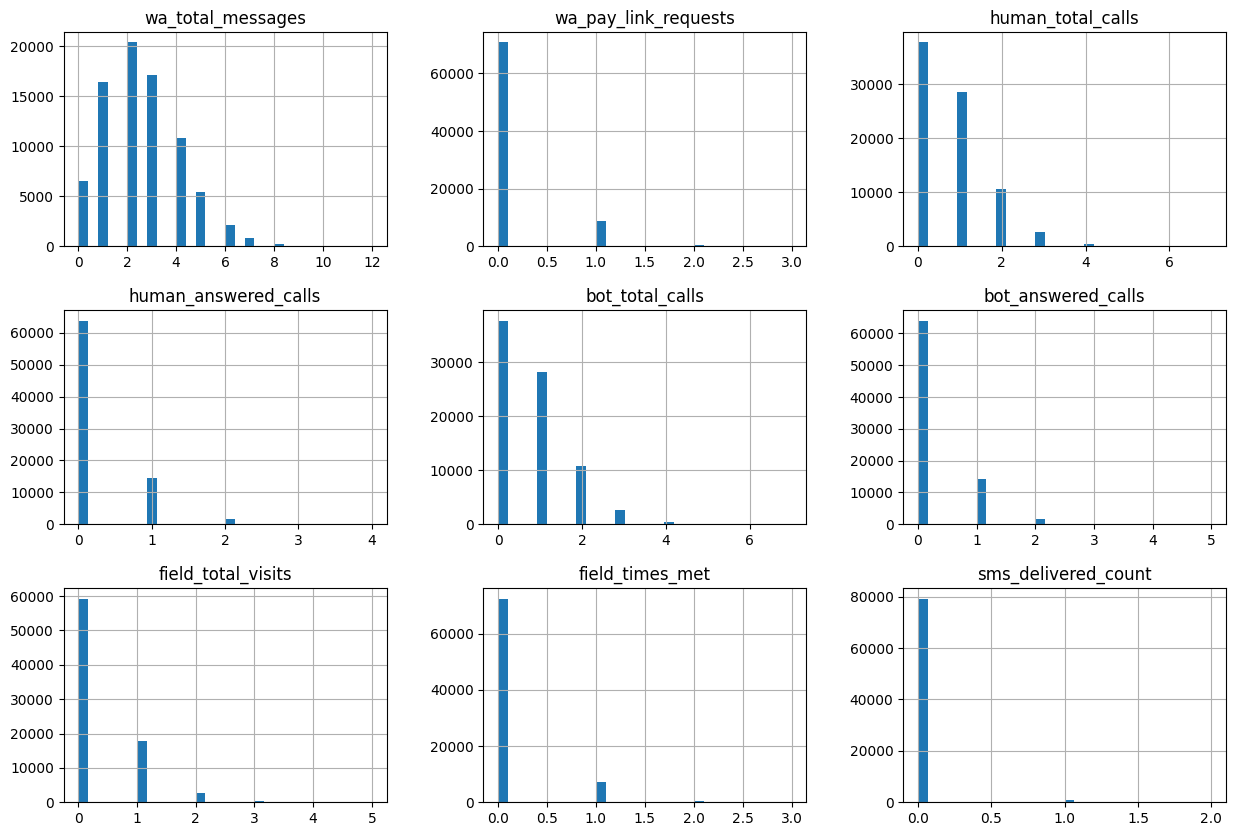

In [35]:
import matplotlib.pyplot as plt
interaction_cols = [
    "wa_total_messages", "wa_pay_link_requests",
    "human_total_calls", "human_answered_calls",
    "bot_total_calls", "bot_answered_calls",
    "field_total_visits", "field_times_met",
    "sms_delivered_count"
]

train[interaction_cols].hist(figsize=(15,10), bins=30)
plt.show()

In [36]:
features = [
    'suggested_action',
    'wa_total_messages',
    'wa_pay_link_requests',
    'human_total_calls',
    'human_answered_calls',
    'bot_total_calls',
    'bot_answered_calls',
    'field_total_visits',
    'field_times_met',
    'sms_delivered_count'
]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [38]:
X = train[features]
y = train["TARGET"]
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [39]:
categorical_cols = ["suggested_action"]
numerical_cols = [cols for cols in features if cols not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers = [
        ("cat",OneHotEncoder(handle_unknown = "ignore"),categorical_cols),
        ("num","passthrough",numerical_cols)
    ]
)

In [40]:
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

In [41]:
model = XGBRegressor(
    n_estimators = 300,
    learning_rate = 0.1,
    max_depth = 6,
    random_state = 42
)

In [42]:
model.fit(X_train_processed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
y_pred = model.predict(X_val_processed)

mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MAE:", mae)
print("R² Score:", r2)

MAE: 0.139928011987973
R² Score: 0.23532451061499748


In [44]:
train['human_answer_rate'] = train['human_answered_calls'] / (train['human_total_calls'] + 1e-6)
train['bot_answer_rate'] = train['bot_answered_calls'] / (train['bot_total_calls'] + 1e-6)
train['wa_pay_link_rate'] = train['wa_pay_link_requests'] / (train['wa_total_messages'] + 1e-6)
train['field_success_rate'] = train['field_times_met'] / (train['field_total_visits'] + 1e-6)

In [45]:
test['human_answer_rate'] = test['human_answered_calls'] / (test['human_total_calls'] + 1e-6)
test['bot_answer_rate'] = test['bot_answered_calls'] / (test['bot_total_calls'] + 1e-6)
test['wa_pay_link_rate'] = test['wa_pay_link_requests'] / (test['wa_total_messages'] + 1e-6)
test['field_success_rate'] = test['field_times_met'] / (test['field_total_visits'] + 1e-6)


In [46]:
train['digital_responsiveness'] = train['wa_pay_link_rate'] + train['bot_answer_rate']
train['call_responsiveness'] = train['human_answer_rate']
train['field_responsiveness'] = train['field_success_rate']


In [47]:
test['digital_responsiveness'] = test['wa_pay_link_rate'] + test['bot_answer_rate']
test['call_responsiveness'] = test['human_answer_rate']
test['field_responsiveness'] = test['field_success_rate']

In [48]:
train.head()

,id,lead_code,suggested_action,TARGET,wa_total_messages,wa_pay_link_requests,human_total_calls,human_answered_calls,bot_total_calls,bot_answered_calls,field_total_visits,field_times_met,sms_delivered_count,human_answer_rate,bot_answer_rate,wa_pay_link_rate,field_success_rate,digital_responsiveness,call_responsiveness,field_responsiveness
0,1,LDSMFG_100000,ACTION_HUMAN_CALL,0.47,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,2,LDSMFG_100001,ACTION_FIELD,0.35,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,3,LDSMFG_100002,ACTION_HUMAN_CALL,0.09,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,4,LDSMFG_100003,ACTION_DIGITAL,0.40,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.999999,0.0,0.0,0.999999,0.0,0.0
4,5,LDSMFG_100004,ACTION_HUMAN_CALL,0.49,3.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.666666,0.0,0.0,0.666666,0.0,0.0


In [49]:
test.head()

,id,lead_code,suggested_action,wa_total_messages,wa_pay_link_requests,human_total_calls,human_answered_calls,bot_total_calls,bot_answered_calls,field_total_visits,field_times_met,sms_delivered_count,human_answer_rate,bot_answer_rate,wa_pay_link_rate,field_success_rate,digital_responsiveness,call_responsiveness,field_responsiveness
0,80001,LDSMFG_180000,ACTION_FIELD,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,80002,LDSMFG_180001,ACTION_BOT,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,80003,LDSMFG_180002,ACTION_FIELD,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.999999,0.0,0.0,0.999999,0.0,0.0
3,80004,LDSMFG_180003,ACTION_DIGITAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,80005,LDSMFG_180004,ACTION_FIELD,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0,0.0


In [50]:
train['digital_responsiveness'] = train['wa_pay_link_rate'] + train['bot_answer_rate']
train['call_responsiveness'] = train['human_answer_rate']
train['field_responsiveness'] = train['field_success_rate']

In [51]:
test['digital_responsiveness'] = test['wa_pay_link_rate'] + test['bot_answer_rate']
test['call_responsiveness'] = test['human_answer_rate']
test['field_responsiveness'] = test['field_success_rate']

In [52]:
import pandas as pd
train = pd.get_dummies(train, columns=['suggested_action'], drop_first=True)
test = pd.get_dummies(test, columns=['suggested_action'], drop_first=True)

In [53]:
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

test = test[train.columns.drop('TARGET')]  # maintain order

In [54]:
drop_cols = ['id','lead_code']
train = train.drop(columns=drop_cols, errors='ignore')
test = test.drop(columns=drop_cols, errors='ignore')